### ブチサンショウウオは全長15cmほどになる九州（長崎、佐賀、福岡）の限られた山林にしか生息しない絶滅危惧種である。先行研究等によりこれまである程度の生息環境についての知見が得られている。そこでそれらの条件を満たす地域をGIS（地理情報システム）により明らかにすることで、ブチサンショウウオの生息地の推定、および新規生息地候補の同定を目指した。
#### 以下のプログラミングは、申請者が2022年頃に作成したものである。使用言語はPythonであり、シンプルな言語ながら応用に足るほど豊富なライブラリを揃えていることが特徴である。
##### 参考文献（Yusuke et al., WILEY., 2019）

#### 目的の地図とその標高の表示

In [8]:
import requests
from io import StringIO
import string
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

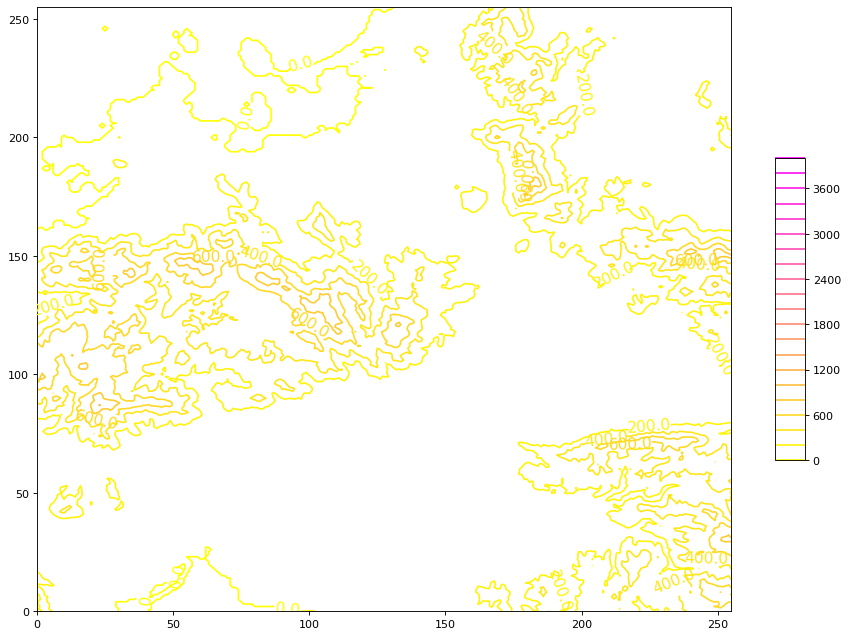

In [2]:
#地形データの読み込み
#地形データは国土地理院HP（https://maps.gsi.go.jp/development/ichiran.html）より入手が可能である。今回は福岡県内を表示する。
url = 'http://cyberjapandata.gsi.go.jp/xyz/dem/9/441/205.txt'
response = requests.get(url)
#標高値がない区画を0mに置換
maptxt = str.replace(response.text, u'e', u'-0.0')
Z = pd.read_csv(StringIO(maptxt), header=None)
#X,Y軸のグリッドを生成
X, Y = np.meshgrid(np.linspace(0,255,256), np.linspace(255,0,256))
#標高100m間隔で等高線を描く
fig = plt.figure(figsize=(14, 10), dpi=80, facecolor='w', edgecolor='k')
elevation = range(0,4100,200)
cont = plt.contour(X, Y, Z, levels=elevation, cmap='spring_r')
cont.clabel(fmt='%1.1f', fontsize=14)
#ラベルをつける
cb = plt.colorbar(cont, shrink=0.5, aspect=10)
#plt.savefig('map.jpg', dpi=72) #保存する場合
plt.show()

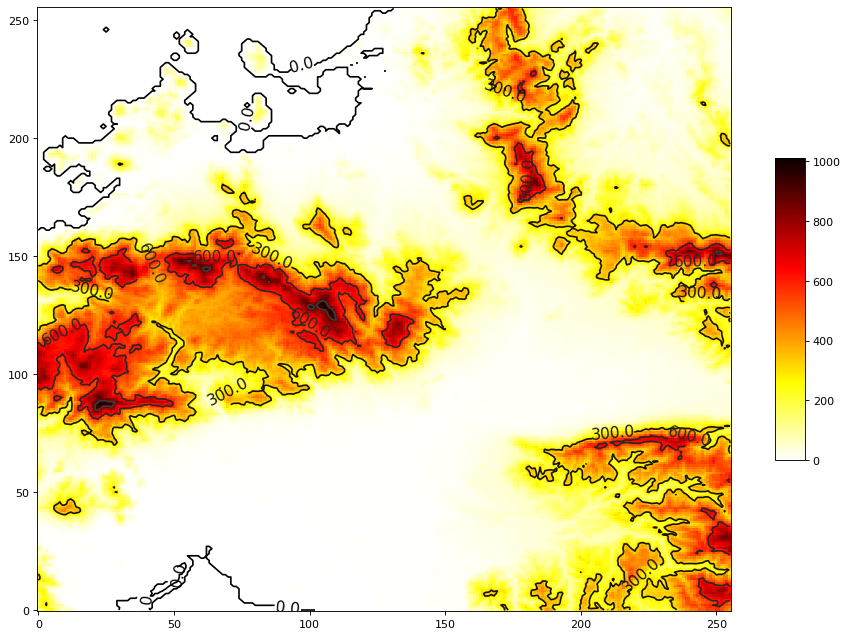

In [7]:
fig = plt.figure(figsize=(14, 10), dpi=80, facecolor='w', edgecolor='k')
#標高に応じて塗りつぶす
pcolor = plt.pcolor(X, Y, Z, cmap='hot_r')
elevation = range(0,4100,300)　# 目的のサンショウウオにあわせて等高線を調整する
cont = plt.contour(X, Y, Z, levels=elevation, cmap='binary_r')
cont.clabel(fmt='%1.1f', fontsize=14)
cb = plt.colorbar(pcolor, shrink=0.5, aspect=10)
#plt.savefig('map.jpg', dpi=72)
plt.show()

#### ブチサンショウウオは300m以上の緩やかな丘陵地から800m程度の山林の比較的流れの遅い小さな沢の浮石（下に水の通る隙間のある石）に産卵を行う。この種類は上図の左中央の山地（脊振山地、福岡県と佐賀県の県境）に特に集中して生息していることが、申請者が仲間らと集めたブチサンショウウオの生息地情報（生物保護の観点のため非公開）により確かめられている。更に、これらの生息地がほとんど全て上図の橙以上の標高で観察されている。また、特に生息数の多い地点ではなるべく高い標高を持つ山からの沢があり、それが緩やかに流れていることが明らかになった。つまり、脊振山地の佐賀県側のような丘陵地を持つ高い山で、図の橙色部以上の標高でサンショウウオの探索を行った。申請者はそこでブチサンショウウオの新規生息地を発見することに成功した。